# CNN MNIST Classifier

In [1]:
import time
import numpy as np
import tensorflow as tf

from scipy.stats import reciprocal

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split, KFold

from utils import *

## Load the data

Split training and test sets.

In [2]:
mnist = fetch_mldata( "MNIST original" )
trainX, testX, trainY, testY = train_test_split( mnist.data, mnist.target,
                                                 test_size = 10000,
                                                 random_state = 123 )

trainX = trainX.reshape( (len(trainX), 28, 28, 1) )/255
testX  = testX.reshape(  (len(testX),  28, 28, 1) )/255

# Tune the model

Search for a good combinaton of hyperparameters.

In [4]:
nines = [ 0.9, 0.99, 0.999, 0.9999 ]
sizes = [ 128, 256, 512, 1024, 2048 ]

paramsList = []

for _ in range(40):
    b1 = float(np.random.choice( nines ))
    b2 = float(np.random.choice( nines ))
    #b3 = float(np.random.choice( nines ))
    n  = int(np.random.choice( sizes ))
    l = reciprocal.rvs( 0.01, 0.5 )
    
    #paramsList.append( { "batchSize" : n, "params" : { "alpha" : l, "b1" : b1, "b2" : b2, "bnm" : b3 } } )
    paramsList.append( { "batchSize" : n, "params" : { "alpha" : l, "b1" : b1, "b2" : b2 } } )

loVal, trHist, vlHist, bestParams = hyperparameterSearch( trainX, trainY, paramsList, 3 )

print( "\n\nLowest validation loss:", loVal )
print( "Best parameters found:", bestParams )

Done    1 of   40 in 151.3s Validation loss: 3.1330945
Done    2 of   40 in 177.6s Validation loss: 0.078608364
Done    3 of   40 in 107.1s Validation loss: 13.727811
Done    4 of   40 in 146.7s Validation loss: 264.87567
Done    5 of   40 in 151.5s Validation loss: 1.6981144
Done    6 of   40 in 152.0s Validation loss: 2.3037796
Done    7 of   40 in 152.1s Validation loss: 2.3014088
Done    8 of   40 in 84.9s Validation loss: 3.094801
Done    9 of   40 in 174.7s Validation loss: 2.3715794
Done   10 of   40 in 129.8s Validation loss: 0.09434525
Done   11 of   40 in 105.5s Validation loss: 220.14868
Done   12 of   40 in 82.6s Validation loss: 1.4671618
Done   13 of   40 in 306.5s Validation loss: 3.79969
Done   14 of   40 in 93.7s Validation loss: 44.96826
Done   15 of   40 in 132.0s Validation loss: 0.07902262
Done   16 of   40 in 373.7s Validation loss: 2.4021597
Done   17 of   40 in 107.0s Validation loss: 0.085625835
Done   18 of   40 in 125.9s Validation loss: 1.0737064
Done   19 o

In [6]:
for i in [ 1, 9, 14, 16, 21, 22 ]:
    print( paramsList[i] )

{'params': {'alpha': 0.04549807220584517, 'b2': 0.9999, 'b1': 0.9}, 'batchSize': 512}
{'params': {'alpha': 0.011342429919674662, 'b2': 0.9999, 'b1': 0.99}, 'batchSize': 256}
{'params': {'alpha': 0.011740934371818444, 'b2': 0.999, 'b1': 0.99}, 'batchSize': 512}
{'params': {'alpha': 0.01553539882204862, 'b2': 0.9, 'b1': 0.9}, 'batchSize': 1024}
{'params': {'alpha': 0.0184765905596971, 'b2': 0.9999, 'b1': 0.99}, 'batchSize': 1024}
{'params': {'alpha': 0.03070517460660552, 'b2': 0.999, 'b1': 0.9}, 'batchSize': 2048}


# Plot learning curves

Plots of the training and validation loss as functions of the epoch number.

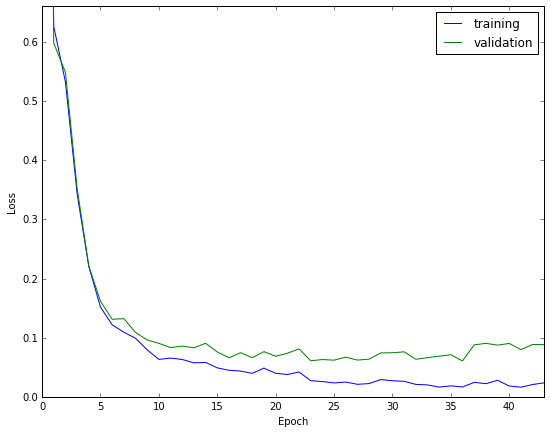

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure( 1, (9, 7) )

plt.plot( trHist[:], label = "training" )
plt.plot( vlHist[:], label = "validation" )

plt.xlim( xmin = 0, xmax = len(trHist) - 1 )
plt.ylim( ymin = 0, ymax = np.max(vlHist[1:]) + .1 * max(trHist[1], vlHist[1]) )

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend( loc = "best" )

plt.show()

#fig.savefig( "learning-LeNet5.eps", format = 'eps', dpi = 20000, bbox_inches = 'tight' )

# Evaluate

Check the performance on the test set.

In [7]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape = (None, 28, 28, 1), name = "X")
y = tf.placeholder(tf.int32, shape = (None), name = "y")
trn = tf.placeholder_with_default( False, shape = (), name = "trn" )

loss, training, accuracy, lossSummary, init, saver = mnistCNN( X, y, trn, **(bestParams["params"]) )

with tf.Session() as sess:

    saver.restore( sess, "./best/mnist-best.ckpt" )
    testAcc = accuracy.eval( feed_dict = { X : testX, y : testY })

    print( "\n\nAccuracy on test set:", testAcc )

INFO:tensorflow:Restoring parameters from ./best/mnist-best.ckpt


Accuracy on test set: 0.9835
